In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import platform
import os
import json

# Data Wrangling
import h5py
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
strain = 'Danionella'

# Load Dictionnary 

In [4]:
data = np.load('TensorTailSample'+strain+'.npy')

In [5]:
data.shape

(2100, 13, 162)

141


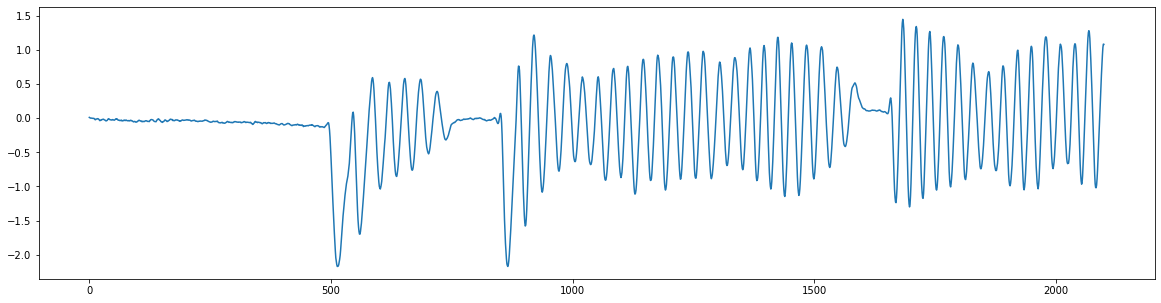

In [12]:
i = np.random.randint(data.shape[-1])
print(i)
plt.figure(figsize=(20,5))
plt.plot(data[:,-1,i])
plt.show()

In [14]:
# Save Dict
strain='Danionella'
import pickle
Atoms_Dataset={}
for num_atoms in range(1,7):
    print(num_atoms)
    if platform.system()=='Linux':
        folder = '/mnt/d/ResultCatchAllBouts3/'+strain+ '/'
    else:
        folder = 'D:/ResultCatchAllBouts3/'+strain+ '/'
    filename=os.path.join(folder,'strain_'+ strain +'_atoms_'+str(num_atoms)+'_Atoms_Dataset.pickle')
    Atoms_Dataset[num_atoms]= pickle.load( open(filename, "rb" ) )



1
2
3
4
5
6


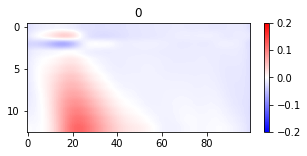

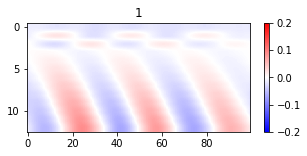

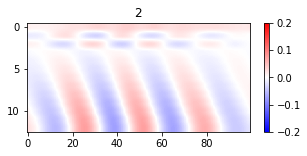

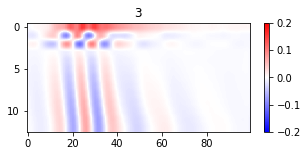

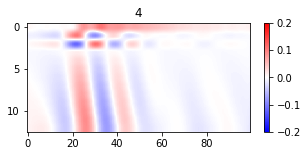

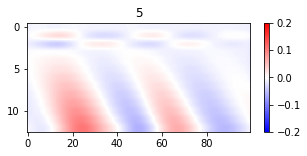

In [15]:
D = Atoms_Dataset[6]['D']
for i in range(D.shape[-1]):
    plt.figure(figsize=(5,2))
    plt.title(str(i))
    plt.imshow(D[:,:,i].T,aspect='auto',vmin=-0.2,vmax=0.2,cmap='bwr')
    plt.colorbar()
    plt.show()

In [16]:
D.shape

(100, 13, 6)

# Compute Optimal Dictionary Size

## Sparsity Constrained reconstruction

In [17]:
from sporco.admm import cbpdn

In [243]:
from sporco.admm import cbpdn
gamma = 400
opt = cbpdn.ConvBPDNProjL1.Options({'Verbose': True, 'MaxMainIter': 50,
                    'HighMemSolve': True, 'LinSolveCheck': False,
                    'RelStopTol': 5e-3, 'AuxVarObj': True, 'rho': 3e0,
                    'AutoRho': {'Enabled': True}})

L2_norm = []
L1_norm = []

for num_atoms in range(1,20):
    print(num_atoms)
    D = Atoms_Dataset[num_atoms]['D']
    #b = cbpdn.ConvBPDNProjL1(D, data[:,3:,:], gamma, opt,dimN=1,dimK=1)
    b = cbpdn.ConvBPDNProjL1(D, data, gamma, opt,dimN=1,dimK=1)
    z = b.solve().squeeze()
    tailhat = b.reconstruct().squeeze()
    print("ConvMinL1InL2Ball solve time: %.2fs" % b.timer.elapsed('solve'))
    #L2_norm.append(np.linalg.norm(tailhat-data[:,3:,:]))
    L2_norm.append(np.linalg.norm(tailhat-data))
    L1_norm.append(np.sum(np.abs(z)))

14  4.17e-02  3.99e-02  6.42e+00
  11  7.96e+04  1.46e-14  3.60e-02  3.54e-02  6.42e+00
  12  7.93e+04  1.03e-14  3.14e-02  3.17e-02  6.42e+00
  13  7.90e+04  1.96e-14  2.74e-02  2.85e-02  6.42e+00
  14  7.88e+04  1.28e-14  2.42e-02  2.60e-02  6.42e+00
  15  7.87e+04  8.09e-15  2.15e-02  2.38e-02  6.42e+00
  16  7.85e+04  1.83e-14  1.92e-02  2.19e-02  6.42e+00
  17  7.84e+04  1.12e-14  1.72e-02  2.01e-02  6.42e+00
  18  7.83e+04  1.41e-14  1.55e-02  1.87e-02  6.42e+00
  19  7.82e+04  1.74e-14  1.49e-02  1.74e-02  5.85e+00
  20  7.81e+04  1.23e-14  1.36e-02  1.63e-02  5.85e+00
  21  7.80e+04  1.71e-14  1.25e-02  1.53e-02  5.85e+00
  22  7.80e+04  1.28e-14  1.24e-02  1.44e-02  5.29e+00
  23  7.79e+04  2.04e-14  1.15e-02  1.36e-02  5.29e+00
  24  7.78e+04  1.47e-14  1.07e-02  1.28e-02  5.29e+00
  25  7.78e+04  1.53e-14  1.00e-02  1.21e-02  5.29e+00
  26  7.77e+04  1.21e-14  1.01e-02  1.15e-02  4.80e+00
  27  7.77e+04  1.97e-14  9.49e-03  1.10e-02  4.80e+00
  28  7.76e+04  1.30e-14  8.93e-

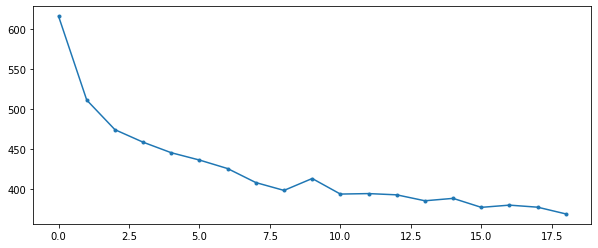

In [253]:
plt.figure(figsize=(10,4))
plt.plot(L2_norm[:],'.-')
#plt.ylim(0,np.max(L2_norm)*1.1)